In [1]:
# Data Source from - https://www.kaggle.com/ylchang/telco-customer-churn-1113

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
# telco_df =  pd.read_excel('Telco_customer_churn.xlsx')
telco_demo_df =  pd.read_excel('Telco_customer_churn_demographics.xlsx')
telco_loc_df =  pd.read_excel('Telco_customer_churn_location.xlsx')
telco_pop_df =  pd.read_excel('Telco_customer_churn_population.xlsx')
telco_serv_df =  pd.read_excel('Telco_customer_churn_services.xlsx')
telco_status_df = pd.read_excel('Telco_customer_churn_status.xlsx')

In [13]:
print(telco_loc_df.shape)
print(telco_loc_df.head())

(7043, 9)
  Customer ID  Count        Country       State         City  Zip Code  \
0  8779-QRDMV      1  United States  California  Los Angeles     90022   
1  7495-OOKFY      1  United States  California  Los Angeles     90063   
2  1658-BYGOY      1  United States  California  Los Angeles     90065   
3  4598-XLKNJ      1  United States  California    Inglewood     90303   
4  4846-WHAFZ      1  United States  California     Whittier     90602   

                 Lat Long   Latitude   Longitude  
0   34.02381, -118.156582  34.023810 -118.156582  
1  34.044271, -118.185237  34.044271 -118.185237  
2  34.108833, -118.229715  34.108833 -118.229715  
3  33.936291, -118.332639  33.936291 -118.332639  
4  33.972119, -118.020188  33.972119 -118.020188  


In [14]:
print(telco_pop_df.shape)
print(telco_pop_df.head())

(1671, 3)
   ID  Zip Code  Population
0   1     90001       54492
1   2     90002       44586
2   3     90003       58198
3   4     90004       67852
4   5     90005       43019


In [15]:
print(telco_serv_df.shape)
print(telco_serv_df.head())

(7043, 30)
  Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0  8779-QRDMV      1      Q3                No                    0   
1  7495-OOKFY      1      Q3               Yes                    1   
2  1658-BYGOY      1      Q3                No                    0   
3  4598-XLKNJ      1      Q3               Yes                    1   
4  4846-WHAFZ      1      Q3               Yes                    1   

   Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges  \
0                 1     None            No                               0.00   
1                 8  Offer E           Yes                              48.85   
2                18  Offer D           Yes                              11.33   
3                25  Offer C           Yes                              19.76   
4                37  Offer C           Yes                               6.33   

  Multiple Lines  ... Unlimited Data        Contract  Paperless Billing  \


In [16]:
print(telco_status_df.shape)
print(telco_status_df.head())

(7043, 11)
  Customer ID  Count Quarter  Satisfaction Score Customer Status Churn Label  \
0  8779-QRDMV      1      Q3                   3         Churned         Yes   
1  7495-OOKFY      1      Q3                   3         Churned         Yes   
2  1658-BYGOY      1      Q3                   2         Churned         Yes   
3  4598-XLKNJ      1      Q3                   2         Churned         Yes   
4  4846-WHAFZ      1      Q3                   2         Churned         Yes   

   Churn Value  Churn Score  CLTV   Churn Category  \
0            1           91  5433       Competitor   
1            1           69  5302       Competitor   
2            1           81  3179       Competitor   
3            1           88  5337  Dissatisfaction   
4            1           67  2793            Price   

                   Churn Reason  
0  Competitor offered more data  
1  Competitor made better offer  
2  Competitor made better offer  
3     Limited range of services  
4            

In [ ]:
# merging customer details, demographics, services and churn details 

In [27]:
telco_pop_df = telco_pop_df.rename(columns={"Zip Code": "Zip Code"})

In [54]:
df1 = pd.DataFrame()

In [61]:
telco_df= telco_df.rename(columns={"CustomerID": "Customer ID"})
df1 = pd.merge(telco_loc_df,telco_demo_df.loc[:, telco_demo_df.columns != 'Count'], 
               how = 'inner', on = ('Customer ID'))
df1 = pd.merge(df1,telco_serv_df.loc[:, telco_serv_df.columns != 'Count'], how = 'inner', on = ('Customer ID'))
df1 = pd.merge(df1,telco_status_df.loc[:, telco_status_df.columns != 'Quarter'], how = 'inner', on = ('Customer ID'))
final_telco_df = pd.merge(df1,telco_pop_df, how = 'inner', on = ('Zip Code'))

In [64]:
final_telco_df.columns
final_telco_df = final_telco_df.rename(columns={"Count_x": "Count"})
final_telco_df = final_telco_df.drop("Count_y",axis=1)

In [66]:
# Final Combined Dataset
final_telco_df.shape

(7043, 54)

In [89]:
final_telco_df.columns

Index(['Customer ID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',
       'Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason',
       'ID', 'Popul

In [67]:
final_telco_df.describe()

,Count,Zip Code,Latitude,Longitude,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,...,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV,ID,Population
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93486.070567,36.197455,-119.756684,46.509726,0.468692,1.951867,32.386767,22.958954,20.515405,...,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,58.505040,4400.295755,784.800653,22139.603294
std,0.0,1856.767505,2.468929,2.154425,16.750352,0.962802,3.001199,24.542061,15.448113,20.418940,...,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152,489.044050,21152.392837
min,1.0,90001.000000,32.555828,-124.301372,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,5.000000,2003.000000,1.000000,11.000000
25%,1.0,92101.000000,33.990646,-121.788090,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,...,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,40.000000,3469.000000,353.000000,2344.000000
50%,1.0,93518.000000,36.205465,-119.595293,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,...,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,61.000000,4527.000000,759.000000,17554.000000
75%,1.0,95329.000000,38.161321,-117.969795,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,...,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,75.500000,5380.500000,1208.000000,36125.000000
max,1.0,96150.000000,41.962127,-114.192901,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,...,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,96.000000,6500.000000,1670.000000,105285.000000


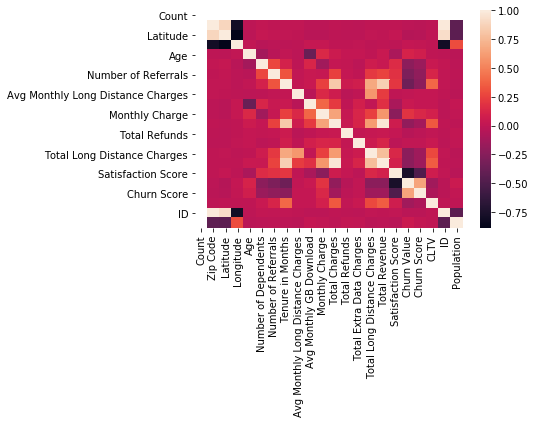

In [69]:
sns.heatmap(final_telco_df.corr())

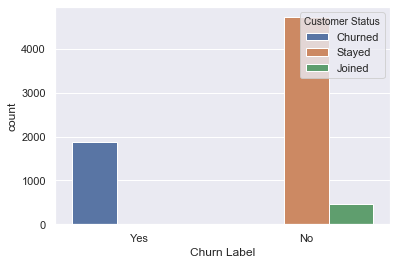

In [73]:
sns.set(style="darkgrid")
sns.countplot('Churn Label',hue="Customer Status", data= final_telco_df)

In [83]:
final_telco_df.groupby('City')['Customer ID'].count()

City
Acampo          4
Acton           4
Adelanto        5
Adin            4
Agoura Hills    5
               ..
Yreka           4
Yuba City       8
Yucaipa         4
Yucca Valley    5
Zenia           4
Name: Customer ID, Length: 1106, dtype: int64

In [85]:
final_telco_df.groupby('Customer Status')['CLTV'].mean()

Customer Status
Churned    4149.414660
Joined     4082.674009
Stayed     4530.189195
Name: CLTV, dtype: float64

In [88]:
final_telco_df['Churn Category'].unique()

array(['Competitor', 'Other', 'Dissatisfaction', 'Attitude', 'Price'],
      dtype=object)

In [87]:
final_telco_df['Churn Category'] = final_telco_df['Churn Category'].replace('nan',np.nan)
final_telco_df['Churn Category'] = final_telco_df['Churn Category'].replace(np.nan,'Other')

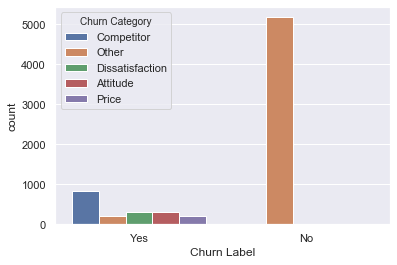

In [90]:
sns.countplot('Churn Label',hue="Churn Category", data= final_telco_df)

In [92]:
final_telco_df.groupby('Churn Label')['Tenure in Months'].mean()

Churn Label
No     37.591225
Yes    17.979133
Name: Tenure in Months, dtype: float64

In [93]:
final_telco_df.groupby('Churn Label')['Total Refunds'].mean()

Churn Label
No     2.122279
Yes    1.518983
Name: Total Refunds, dtype: float64

In [96]:
final_telco_df.groupby('Churn Label')['Offer'].count()

Churn Label
No     5174
Yes    1869
Name: Offer, dtype: int64

In [98]:
pd.crosstab(final_telco_df['Churn Label'], final_telco_df['Offer'])

Offer,None,Offer A,Offer B,Offer C,Offer D,Offer E
Churn Label,,,,,,
No,2826,485,723,320,441,379
Yes,1051,35,101,95,161,426
